In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
data = pd.read_csv("./asm_data_for_ml.txt", sep='\t')

In [421]:
def mask(cola, colb, color=None, p1=99.9, p2=99.9):
    mask = (cola < np.percentile(cola, p1)) & (colb < np.percentile(colb, p2))
    if color is None:
        return cola[mask], colb[mask], None
    else:
        return cola[mask], colb[mask], color[mask]

    

def myhexplot(cola, colb, p1=99.9, p2=99.9, ax=None):
    if ax is None:
        plt.figure()
        ax = plt.gca()
    cola, colb, _ = mask(cola, colb, p1=p1, p2=p2)
    ax.hexbin(cola, colb, cmap='viridis', bins='log')
    ax.set_xlabel(cola.name)
    ax.set_ylabel(colb.name)
    
def myscatterplot(cola, colb, color=None, p1=99.9, p2=99.9, alpha=1):
    plt.figure()
    cola, colb, color = mask(cola, colb, color, p1=p1, p2=p2)
    plt.scatter(cola, colb, cmap='viridis', c=color, alpha=alpha)
    plt.xlabel(cola.name)
    plt.ylabel(colb.name)

<IPython.core.display.Javascript object>


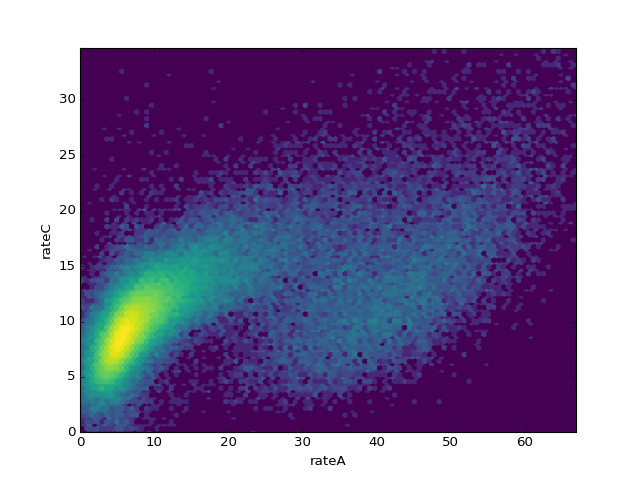

In [149]:
myhexplot(data.rateA, data.rateC)

<IPython.core.display.Javascript object>


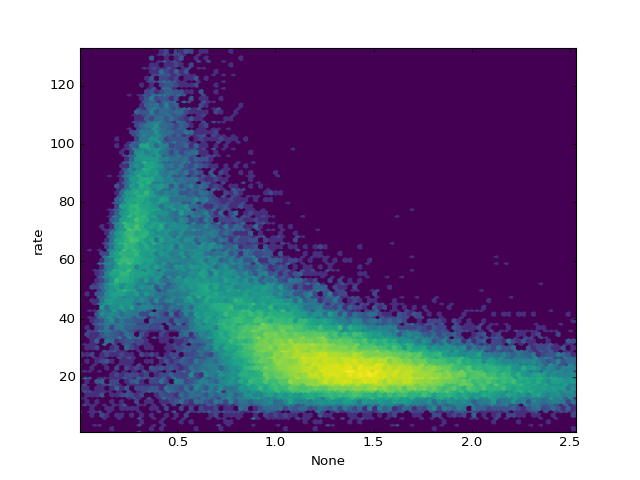

In [144]:
myhexplot(data.rateC / data.rateA, data.rate, p1=95)

<IPython.core.display.Javascript object>


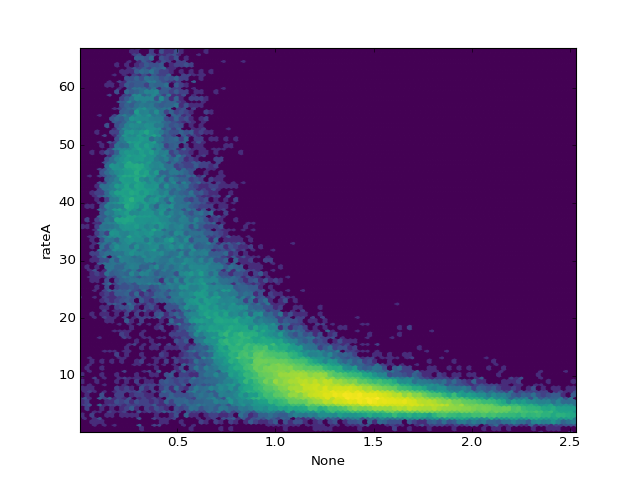

In [150]:
myhexplot(data.rateC / data.rateA, data.rateA, p1=95)

<IPython.core.display.Javascript object>


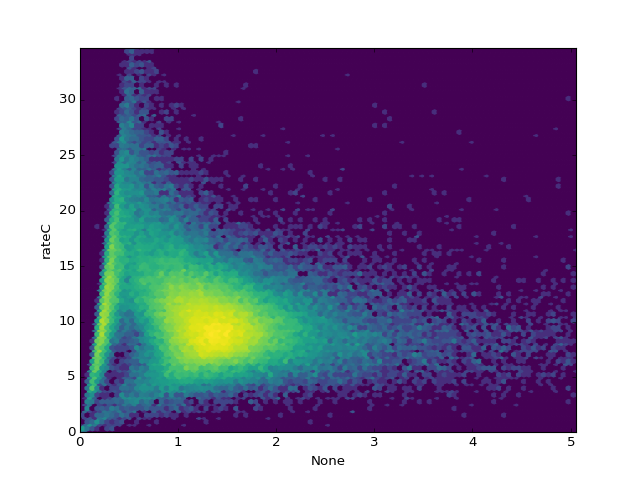

In [145]:
myhexplot(data.rateC / data.rateA, data.rateC, p1=99)

<IPython.core.display.Javascript object>


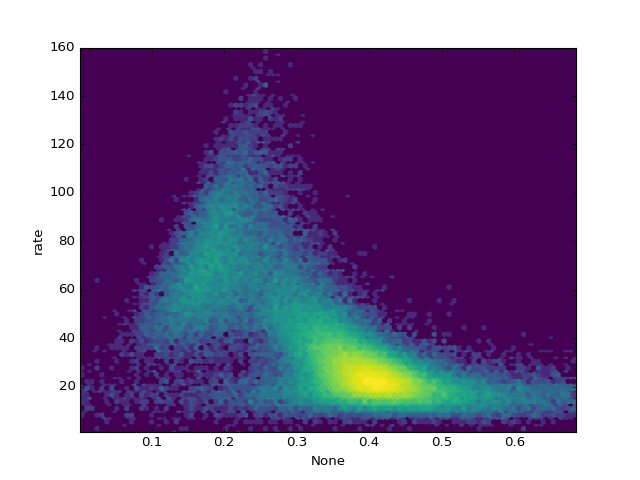

In [151]:
myhexplot(data.rateC / data.rate, data.rate, p1=99, p2=99.99)

<IPython.core.display.Javascript object>


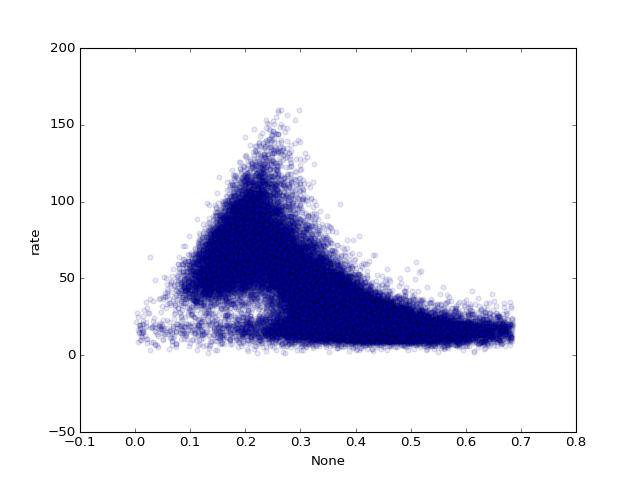

In [156]:
myscatterplot(data.rateC / data.rate, data.rate, p1=99, p2=99.99, alpha=0.1)

<IPython.core.display.Javascript object>


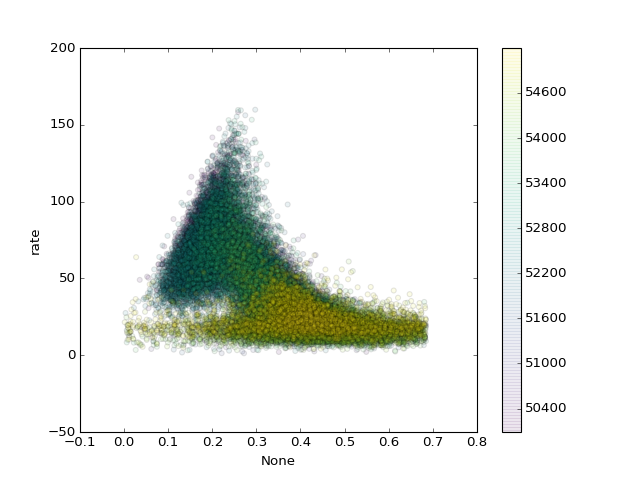

In [158]:
myscatterplot(data.rateC / data.rate, data.rate, color=data.MJD, p1=99, p2=99.99, alpha=0.1)
plt.colorbar()

In [164]:
l.set_data?

<IPython.core.display.Javascript object>


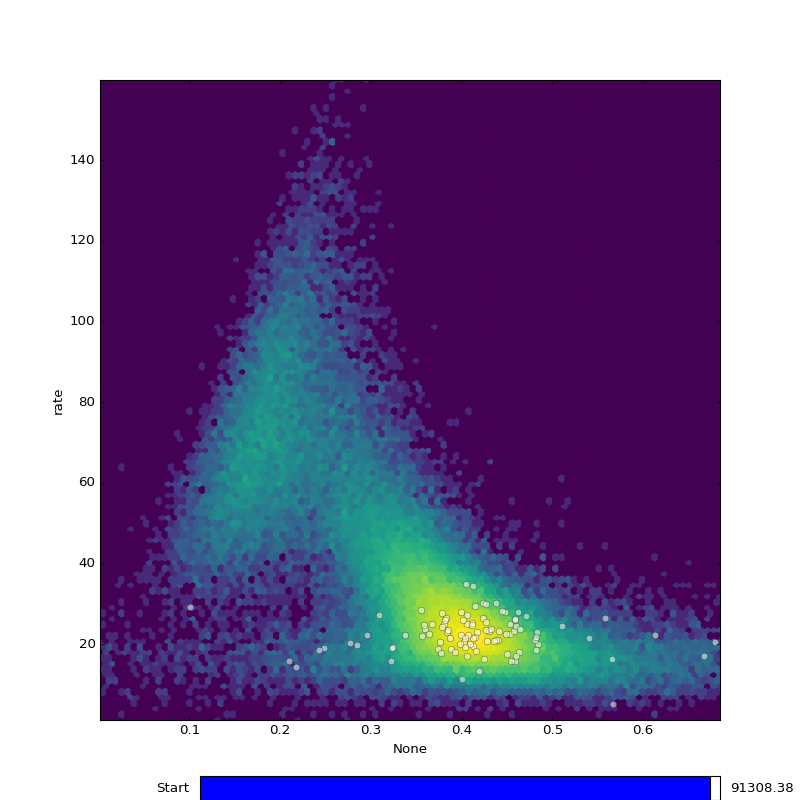

In [461]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons

fig = plt.figure(figsize=(10, 10))
myhexplot(data.rateC / data.rate, data.rate, p1=99, p2=99.99, ax=plt.gca())

cola = data.rateC / data.rate
colb = data.rate
cola, colb, color = mask(cola, colb, p1=99, p2=99.99)


delta = 10
window = 100

def setup_plot(cola, colb):
    dots, = plt.plot(cola, colb, 'o', c='w', alpha=.5)
    plt.xlabel(cola.name)
    plt.ylabel(colb.name)
    return dots

l = setup_plot(cola[:window], colb[:window])

ax = plt.gca()

axfreq = plt.axes([0.25, 0.0, 0.65, 0.03])
sfreq = Slider(axfreq, 'Start', 0, len(cola), valinit=0)

def update(val):
    start = int(sfreq.val)
    inds = range(start, start + window)
    l.set_data(cola.iloc[inds], colb.iloc[inds])
    plt.gcf().canvas.draw_idle()
sfreq.on_changed(update)

ax.set_xlim(cola.min(), cola.max())
ax.set_ylim(colb.min(), colb.max())
plt.show()

In [405]:
preds[:window]

array([0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 3, 0, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0,
       0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [451]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4, n_init=5).fit(np.c_[cola, colb])
preds = gmm.predict(np.c_[cola, colb])
np.bincount(preds)
probs = gmm.predict_proba(np.c_[cola, colb])

<IPython.core.display.Javascript object>


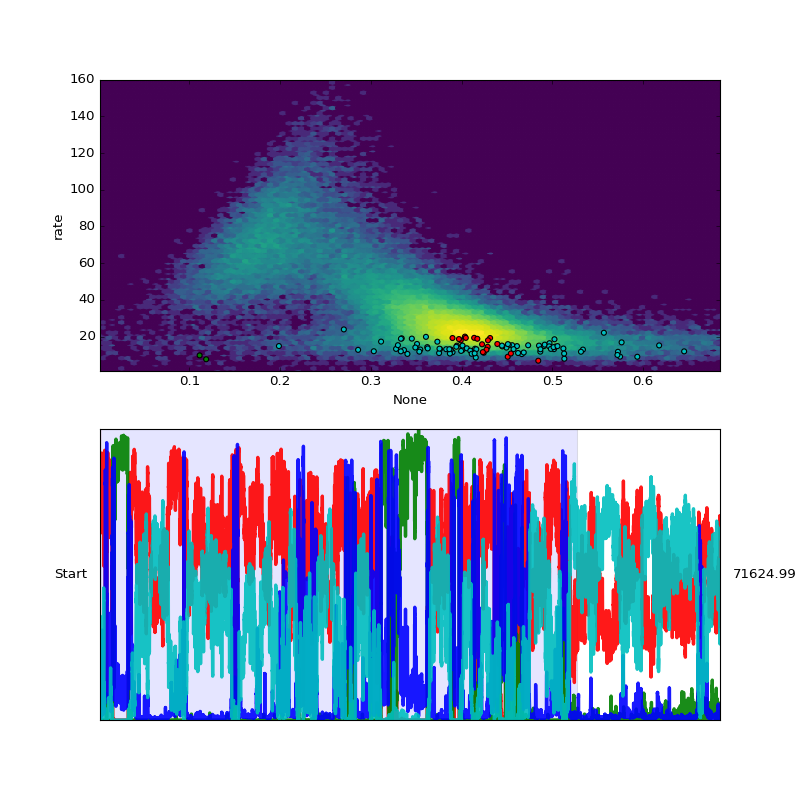

In [450]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons

fig, axes = plt.subplots(2, 1, figsize=(10, 10))
myhexplot(data.rateC / data.rate, data.rate, p1=99, p2=99.99, ax=axes[0])

cola = data.rateC / data.rate
colb = data.rate
cola, colb, color = mask(cola, colb, p1=99, p2=99.99)


delta = 10
window = 100

ax = axes[0]
cm = ListedColormap(['r', 'g', 'b', 'c'])

def setup_plot(cola, colb, c):
    dots = ax.scatter(cola, colb, c=c, alpha=1, s=20, cmap=cm)
    ax.set_xlabel(cola.name)
    ax.set_ylabel(colb.name)
    return dots

l = setup_plot(cola[:window], colb[:window], c=preds[:window])

chunks = float(len(cola)) / delta

# axfreq = plt.axes([0.1, 0.0, 0.8, 0.03])
sfreq = Slider(axes[1], 'Start', 0, len(cola), valinit=0, facecolor=None, alpha=.1)
for prob, color in zip(probs.T, ['r', 'g', 'b', 'c']):
    axes[1].plot(pd.Series(prob).rolling(window=50).mean(), color=color, alpha=.9, linewidth=3)

def update(val):
    start = int(sfreq.val)
    inds = range(start, start + window)
    l.set_offsets(np.c_[cola.iloc[inds], colb.iloc[inds]])
    l.set_array(preds[inds])
    plt.gcf().canvas.draw_idle()
sfreq.on_changed(update)

ax.set_xlim(cola.min(), cola.max())
ax.set_ylim(colb.min(), colb.max())
plt.show()

<IPython.core.display.Javascript object>


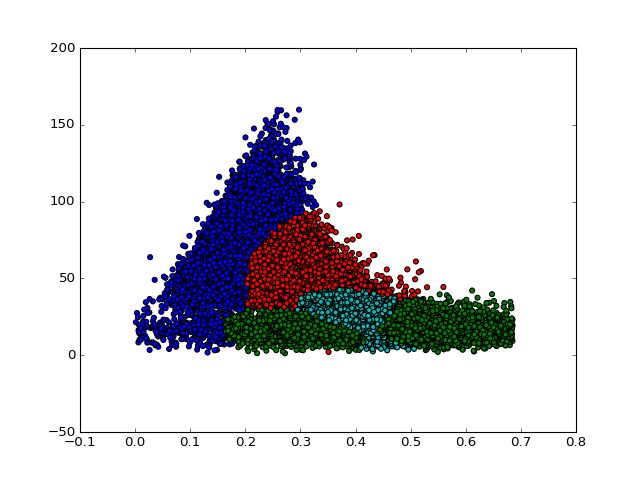

In [294]:
plt.figure()
bla = plt.scatter(cola, colb, c=preds, cmap=ListedColormap(['r', 'g', 'b', 'c']))

In [353]:
model.transmat_prior

1.0

<IPython.core.display.Javascript object>


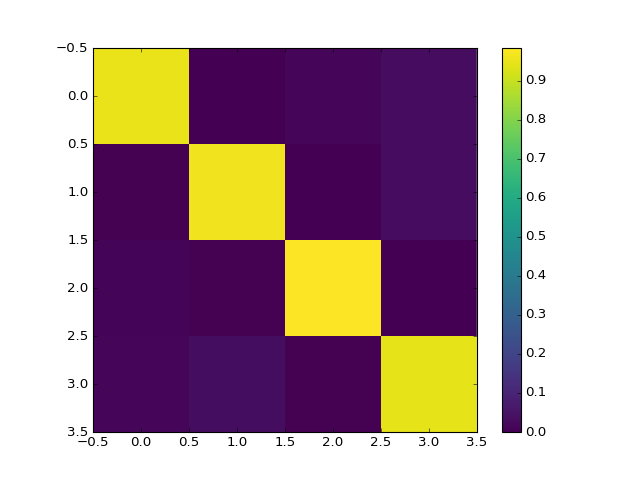

In [378]:
plt.figure()
plt.imshow(model.transmat_, cmap='viridis', interpolation="none")
plt.colorbar()

In [452]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3, n_init=5).fit(np.c_[cola, colb])
preds = gmm.predict(np.c_[cola, colb])
probs = gmm.predict_proba(np.c_[cola, colb])

In [459]:
np.bincount(preds)


array([64660, 13123, 15334])

<IPython.core.display.Javascript object>


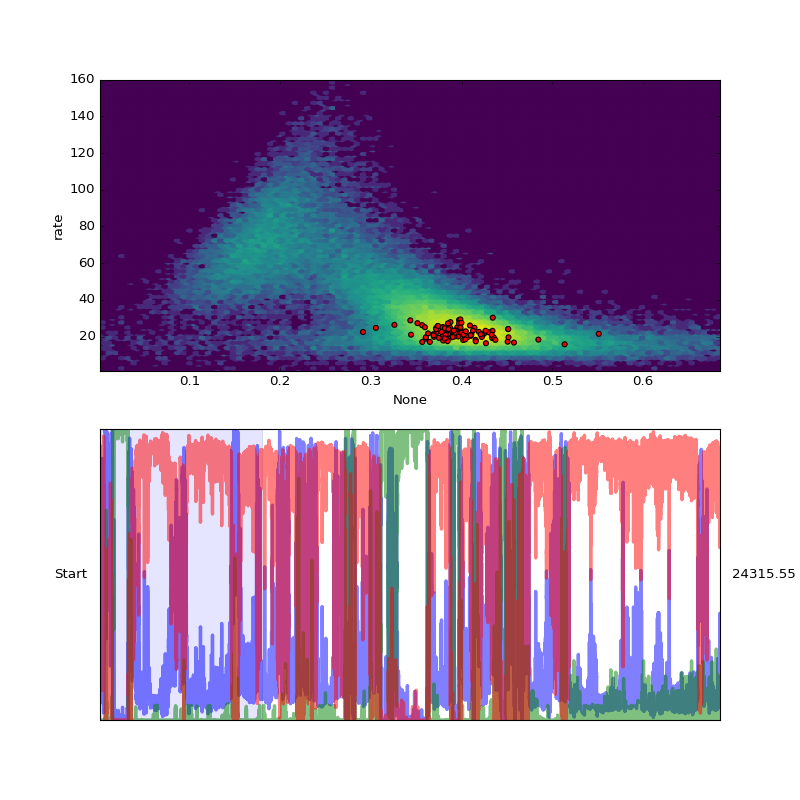

In [467]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons

fig, axes = plt.subplots(2, 1, figsize=(10, 10))
myhexplot(data.rateC / data.rate, data.rate, p1=99, p2=99.99, ax=axes[0])

cola = data.rateC / data.rate
colb = data.rate
cola, colb, color = mask(cola, colb, p1=99, p2=99.99)

window = 100

ax = axes[0]
cm = ListedColormap(['r', 'g', 'b'])

def setup_plot(cola, colb, c):
    dots = ax.scatter(cola, colb, c=c, alpha=1, s=20, cmap=cm)
    ax.set_xlabel(cola.name)
    ax.set_ylabel(colb.name)
    return dots

l = setup_plot(cola[:5 * window], colb[:5 * window], c=preds[:5 * window])

sfreq = Slider(axes[1], 'Start', 0, len(cola), valinit=0, facecolor=None, alpha=.1)
for prob, color in zip(probs.T[::-1], ['r', 'g', 'b'][::-1]):
    axes[1].plot(pd.Series(prob).rolling(window=20).mean(), color=color, alpha=.5, linewidth=3)

def update(val):
    start = int(sfreq.val)
    inds = range(start, start + window)
    l.set_offsets(np.c_[cola.iloc[inds], colb.iloc[inds]])
    l.set_array(preds[inds])
    plt.gcf().canvas.draw_idle()
sfreq.on_changed(update)

ax.set_xlim(cola.min(), cola.max())
ax.set_ylim(colb.min(), colb.max())
plt.show()

<IPython.core.display.Javascript object>


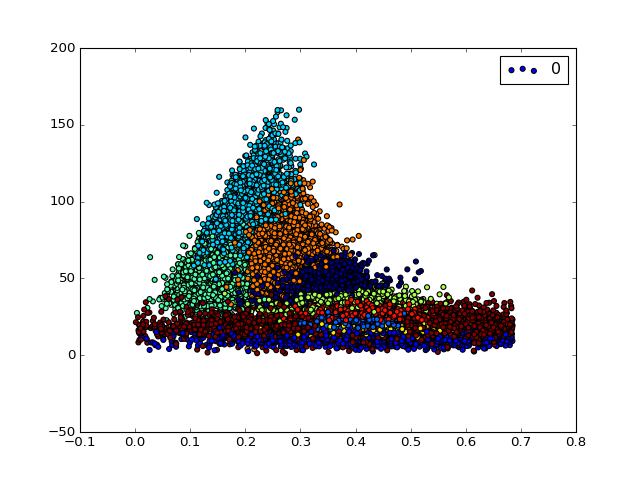

In [362]:
plt.figure()
grr = plt.scatter(cola, colb, c=pred_)


In [ ]:
grr.set_offsets()

sc.set_array updates the data used for color mapping
sc.set_offsets sets the x/y
and I think sc.set_sizes set the size scale

<IPython.core.display.Javascript object>


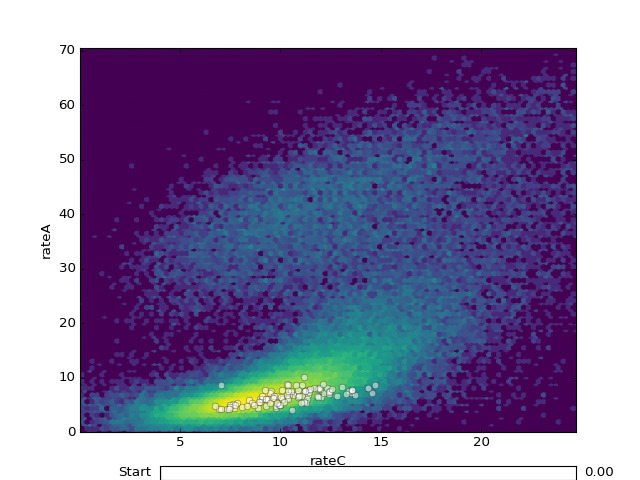

In [262]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons


cola = data.rateC
colb = data.rateA
myhexplot(cola, colb, p1=99, p2=99.99)

cola, colb, color = mask(cola, colb, p1=99, p2=99.99)


delta = 10
window = 100

def setup_plot(cola, colb):
    dots, = plt.plot(cola, colb, 'o', c='w', alpha=.5)
    plt.xlabel(cola.name)
    plt.ylabel(colb.name)
    return dots

l = setup_plot(cola[:window], colb[:window])

ax = plt.gca()

chunks = float(len(cola)) / delta

axfreq = plt.axes([0.25, 0.0, 0.65, 0.03])
sfreq = Slider(axfreq, 'Start', 0, chunks, valinit=0)


def update(val):
    start = int(sfreq.val)
    inds = range(start * delta, start * delta + window)
    l.set_data(cola.iloc[inds], colb.iloc[inds])
    plt.gcf().canvas.draw_idle()
    
sfreq.on_changed(update)

ax.set_xlim(cola.min(), cola.max())
ax.set_ylim(colb.min(), colb.max())
plt.show()

In [388]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_components': [1, 2, 3, 4, 5, 6, 7, 10]}
gmm = GaussianMixture(n_init=5, verbose=0)
grid = GridSearchCV(gmm, param_grid, cv=10, verbose=3).fit(np.c_[cola, colb])

Fitting 10 folds for each of 8 candidates, totalling 80 fits
[CV] n_components=1 ..................................................
[CV] ........................ n_components=1, score=-3.656001 -   0.1s
[CV] n_components=1 ..................................................
[CV] ........................ n_components=1, score=-2.577278 -   0.1s
[CV] n_components=1 ..................................................
[CV] ........................ n_components=1, score=-2.520681 -   0.1s
[CV] n_components=1 ..................................................
[CV] ........................ n_components=1, score=-2.669563 -   0.1s
[CV] n_components=1 ..................................................
[CV] ........................ n_components=1, score=-4.103386 -   0.1s
[CV] n_components=1 ..................................................
[CV] ........................ n_components=1, score=-4.155187 -   0.1s
[CV] n_components=1 ..................................................
[CV] ...........

[Parallel(n_jobs=1)]: Done  31 tasks       | elapsed:   39.7s


[CV] ........................ n_components=4, score=-1.794195 -   6.5s
[CV] n_components=4 ..................................................
[CV] ........................ n_components=4, score=-1.879509 -   6.7s
[CV] n_components=4 ..................................................
[CV] ........................ n_components=4, score=-2.237112 -   6.6s
[CV] n_components=4 ..................................................
[CV] ........................ n_components=4, score=-3.543353 -   5.1s
[CV] n_components=4 ..................................................
[CV] ........................ n_components=4, score=-3.126613 -   4.5s
[CV] n_components=4 ..................................................
[CV] ........................ n_components=4, score=-3.071622 -   6.5s
[CV] n_components=4 ..................................................
[CV] ........................ n_components=4, score=-2.424477 -   7.6s
[CV] n_components=4 ..................................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  7.1min finished


In [389]:
grid.grid_scores_

[mean: -3.24316, std: 0.56818, params: {'n_components': 1},
 mean: -2.75699, std: 0.53411, params: {'n_components': 2},
 mean: -2.68563, std: 0.51508, params: {'n_components': 3},
 mean: -2.63430, std: 0.52815, params: {'n_components': 4},
 mean: -2.61269, std: 0.52897, params: {'n_components': 5},
 mean: -2.60561, std: 0.53667, params: {'n_components': 6},
 mean: -2.60205, std: 0.53677, params: {'n_components': 7},
 mean: -2.60269, std: 0.53938, params: {'n_components': 10}]

In [390]:
[x.cv_validation_scores for x in grid.grid_scores_]

[array([-3.656001  , -2.57727781, -2.52068114, -2.66956317, -4.10338633,
        -4.15518734, -3.13203669, -2.90407163, -3.21786401, -3.49551356]),
 array([-2.96471926, -1.84826071, -2.04903786, -2.34068572, -3.61131469,
        -3.31163873, -3.1346966 , -2.49743445, -2.8131884 , -2.99894109]),
 array([-2.85914822, -1.85263444, -1.96872479, -2.26113312, -3.52527702,
        -3.19237434, -3.14208456, -2.47844102, -2.76837365, -2.80807638]),
 array([-2.82212847, -1.79419475, -1.87950874, -2.23711212, -3.5433533 ,
        -3.12661262, -3.07162185, -2.42447728, -2.69484234, -2.7491794 ]),
 array([-2.81254125, -1.77245714, -1.87130021, -2.23094604, -3.53935158,
        -3.11274082, -3.06648466, -2.41616165, -2.64048825, -2.66445624]),
 array([-2.81428002, -1.74786642, -1.8526686 , -2.22454785, -3.54449813,
        -3.10366   , -3.07897703, -2.42270458, -2.62762881, -2.63925248]),
 array([-2.81137849, -1.7420748 , -1.84651617, -2.22162466, -3.53606791,
        -3.10345601, -3.07696263, -2.42

In [398]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_components': [1, 2, 3, 4, 5, 6, 7, 10]}
model = hmm.GaussianHMM(n_components=4, verbose=10, n_iter=50, random_state=0, covariance_type="full").fit(X)
grid = GridSearchCV(model, param_grid, cv=5, verbose=3).fit(np.c_[cola, colb])

         1     -314683.7379             +nan
         2     -232604.6698      +82079.0680
         3     -208865.8726      +23738.7973
         4     -199232.4800       +9633.3925
         5     -191945.2214       +7287.2586
         6     -184677.7706       +7267.4509
         7     -176174.6344       +8503.1362
         8     -171385.4854       +4789.1489
         9     -167894.2303       +3491.2552
        10     -165643.7753       +2250.4550
        11     -164571.0200       +1072.7553
        12     -164141.5534        +429.4665
        13     -163974.6994        +166.8540
        14     -163906.9306         +67.7688
        15     -163877.5068         +29.4238
        16     -163863.6739         +13.8329
        17     -163856.4915          +7.1824
        18     -163852.2701          +4.2214
        19     -163849.2769          +2.9933
        20     -163846.2716          +3.0053
        21     -163842.8560          +3.4156
        22     -163840.1478          +2.7081
        23

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] n_components=1 ..................................................
[CV] .................... n_components=1, score=-57015.790440 -   0.1s
[CV] n_components=1 ..................................................


         2     -244639.7478        +509.7328
         3     -244639.7478          +0.0000
         1     -216215.1559             +nan
         2     -215410.1669        +804.9889
         3     -215410.1669          +0.0000


[CV] .................... n_components=1, score=-49341.981600 -   0.1s
[CV] n_components=1 ..................................................
[CV] .................... n_components=1, score=-85065.198412 -   0.1s
[CV] n_components=1 ..................................................


         1     -237933.2208             +nan
         2     -237321.2652        +611.9556
         3     -237321.2652          +0.0000
         1     -231427.9107             +nan
         2     -230457.1672        +970.7435
         3     -230457.1672          +0.0000


[CV] .................... n_components=1, score=-55756.904253 -   0.1s
[CV] n_components=1 ..................................................
[CV] .................... n_components=1, score=-65108.182904 -   0.1s
[CV] n_components=2 ..................................................


         1     -251924.0612             +nan
         2     -194367.7411      +57556.3200
         3     -176815.3791      +17552.3621
         4     -175327.3309       +1488.0481
         5     -175124.0981        +203.2329
         6     -175025.8384         +98.2597
         7     -174965.9829         +59.8555
         8     -174929.6997         +36.2832
         9     -174908.3075         +21.3922
        10     -174895.5187         +12.7888
        11     -174887.8166          +7.7022
        12     -174883.1689          +4.6477
        13     -174880.3455          +2.8233
        14     -174878.6080          +1.7376
        15     -174877.5205          +1.0875
        16     -174876.8280          +0.6925
        17     -174876.3801          +0.4479
        18     -174876.0866          +0.2935
        19     -174875.8925          +0.1941
        20     -174875.7632          +0.1293
        21     -174875.6766          +0.0866
        22     -174875.6184          +0.0582
        23

[CV] .................... n_components=2, score=-38390.940038 -   2.1s
[CV] n_components=2 ..................................................


         1     -259412.1291             +nan
         2     -198537.6001      +60874.5290
         3     -178127.6067      +20409.9933
         4     -176923.7264       +1203.8804
         5     -176797.7372        +125.9892
         6     -176740.9690         +56.7682
         7     -176708.2510         +32.7180
         8     -176692.2903         +15.9607
         9     -176684.9970          +7.2933
        10     -176681.6833          +3.3137
        11     -176680.1576          +1.5257
        12     -176679.4452          +0.7125
        13     -176679.1088          +0.3364
        14     -176678.9488          +0.1600
        15     -176678.8723          +0.0765
        16     -176678.8356          +0.0367
        17     -176678.8180          +0.0176
        18     -176678.8096          +0.0084


[CV] .................... n_components=2, score=-36607.667727 -   1.5s
[CV] n_components=2 ..................................................


         1     -237949.6770             +nan
         2     -171723.1162      +66226.5608
         3     -163340.0675       +8383.0486
         4     -161881.0154       +1459.0521
         5     -161361.4632        +519.5523
         6     -161129.3307        +232.1324
         7     -161033.8152         +95.5155
         8     -160989.5628         +44.2524
         9     -160970.2201         +19.3427
        10     -160961.7585          +8.4616
        11     -160957.8852          +3.8733
        12     -160956.1286          +1.7565
        13     -160955.3607          +0.7679
        14     -160955.0356          +0.3251
        15     -160954.9008          +0.1348
        16     -160954.8457          +0.0552
        17     -160954.8232          +0.0224
        18     -160954.8141          +0.0091


[CV] .................... n_components=2, score=-58210.147042 -   1.6s
[CV] n_components=2 ..................................................


         1     -253884.2858             +nan
         2     -185810.3477      +68073.9381
         3     -168689.7530      +17120.5948
         4     -168106.8925        +582.8605
         5     -168041.3780         +65.5144
         6     -168010.9136         +30.4644
         7     -167994.7131         +16.2005
         8     -167985.5129          +9.2002
         9     -167980.2435          +5.2694
        10     -167977.2723          +2.9712
        11     -167975.6065          +1.6658
        12     -167974.6702          +0.9363
        13     -167974.1407          +0.5295
        14     -167973.8391          +0.3016
        15     -167973.6660          +0.1731
        16     -167973.5661          +0.0999
        17     -167973.5081          +0.0580
        18     -167973.4743          +0.0338
        19     -167973.4545          +0.0198
        20     -167973.4429          +0.0116
        21     -167973.4361          +0.0068


[CV] .................... n_components=2, score=-44952.220773 -   1.7s
[CV] n_components=2 ..................................................


         1     -245061.7518             +nan
         2     -184317.5300      +60744.2219
         3     -162909.4048      +21408.1252
         4     -161286.1816       +1623.2232
         5     -161193.8689         +92.3126
         6     -161172.3393         +21.5297
         7     -161163.4771          +8.8621
         8     -161159.5510          +3.9262
         9     -161157.8558          +1.6952
        10     -161157.1484          +0.7074
        11     -161156.8592          +0.2893
        12     -161156.7421          +0.1171
        13     -161156.6950          +0.0471
        14     -161156.6762          +0.0189
        15     -161156.6686          +0.0075


[CV] .................... n_components=2, score=-56511.018944 -   1.3s
[CV] n_components=3 ..................................................


         1     -252860.1992             +nan
         2     -195454.3419      +57405.8572
         3     -177196.5580      +18257.7839
         4     -169869.6722       +7326.8858
         5     -166485.1111       +3384.5612
         6     -163313.5041       +3171.6070
         7     -159593.4318       +3720.0723
         8     -155441.0047       +4152.4271
         9     -151498.6734       +3942.3312
        10     -150425.6624       +1073.0111
        11     -150310.1799        +115.4824
        12     -150288.6472         +21.5328
        13     -150279.7285          +8.9186
        14     -150274.1609          +5.5677
        15     -150270.3177          +3.8432
        16     -150267.6126          +2.7051
        17     -150265.6931          +1.9195
        18     -150264.3177          +1.3754
        19     -150263.3214          +0.9963
        20     -150262.5927          +0.7287
        21     -150262.0560          +0.5367
        22     -150261.6591          +0.3969
        23

[CV] .................... n_components=3, score=-31791.368436 -   5.4s
[CV] n_components=3 ..................................................


         1     -262084.3549             +nan
         2     -198955.0946      +63129.2602
         3     -177574.1445      +21380.9501
         4     -169813.7790       +7760.3655
         5     -166054.6236       +3759.1554
         6     -163137.1681       +2917.4555
         7     -160038.8765       +3098.2916
         8     -157256.5729       +2782.3036
         9     -154394.2538       +2862.3191
        10     -152756.8964       +1637.3574
        11     -152577.9766        +178.9198
        12     -152516.5113         +61.4653
        13     -152470.3746         +46.1367
        14     -152434.2577         +36.1169
        15     -152406.3500         +27.9077
        16     -152383.8600         +22.4900
        17     -152364.8903         +18.9697
        18     -152347.7109         +17.1794
        19     -152331.5205         +16.1904
        20     -152317.0584         +14.4621
        21     -152304.9756         +12.0828
        22     -152294.8575         +10.1181
        23

[CV] .................... n_components=3, score=-29690.508692 -   6.2s
[CV] n_components=3 ..................................................


         1     -231723.7888             +nan
         2     -171694.1507      +60029.6381
         3     -161555.1647      +10138.9860
         4     -155456.6049       +6098.5597
         5     -149757.9699       +5698.6350
         6     -144275.1817       +5482.7882
         7     -140081.6158       +4193.5660
         8     -138176.4297       +1905.1861
         9     -137601.9953        +574.4344
        10     -137449.7178        +152.2774
        11     -137408.6622         +41.0556
        12     -137396.9489         +11.7133
        13     -137393.1879          +3.7610
        14     -137391.7019          +1.4859
        15     -137390.9456          +0.7564
        16     -137390.4759          +0.4697
        17     -137390.1515          +0.3244
        18     -137389.9174          +0.2342
        19     -137389.7458          +0.1716
        20     -137389.6196          +0.1262
        21     -137389.5269          +0.0927
        22     -137389.4589          +0.0680
        23

[CV] .................... n_components=3, score=-48417.290279 -   4.5s
[CV] n_components=3 ..................................................


         1     -255458.8558             +nan
         2     -188387.7450      +67071.1108
         3     -166893.7075      +21494.0375
         4     -158607.2072       +8286.5002
         5     -155238.8515       +3368.3558
         6     -153076.1400       +2162.7114
         7     -151881.2797       +1194.8604
         8     -151261.3031        +619.9765
         9     -150893.8915        +367.4116
        10     -150587.8292        +306.0623
        11     -150168.7010        +419.1281
        12     -149294.0054        +874.6957
        13     -147320.7253       +1973.2800
        14     -144239.1656       +3081.5598
        15     -142593.1384       +1646.0271
        16     -142339.2900        +253.8485
        17     -142273.0963         +66.1937
        18     -142239.9481         +33.1481
        19     -142216.8098         +23.1383
        20     -142199.0615         +17.7482
        21     -142187.4830         +11.5786
        22     -142180.5462          +6.9368
        23

[CV] .................... n_components=3, score=-39935.575893 -   5.9s
[CV] n_components=3 ..................................................


         1     -247424.5123             +nan
         2     -185277.9746      +62146.5377
         3     -163755.1009      +21522.8737
         4     -155295.3921       +8459.7088
         5     -149202.1825       +6093.2096
         6     -143869.7310       +5332.4515
         7     -139709.9613       +4159.7697
         8     -136953.0559       +2756.9054
         9     -136484.5176        +468.5384
        10     -136343.9464        +140.5712
        11     -136268.8206         +75.1257
        12     -136219.0261         +49.7945
        13     -136184.3335         +34.6926
        14     -136159.2806         +25.0529
        15     -136140.4806         +18.8000
        16     -136125.7252         +14.7554
        17     -136113.8103         +11.9149
        18     -136104.4868          +9.3235
        19     -136097.5657          +6.9210
        20     -136092.4352          +5.1306
        21     -136088.5629          +3.8723
        22     -136085.6457          +2.9172
        23

[CV] .................... n_components=3, score=-50179.997542 -   6.5s
[CV] n_components=4 ..................................................


         1     -254412.5947             +nan
         2     -192408.1352      +62004.4596
         3     -172931.3776      +19476.7576
         4     -164559.8150       +8371.5625
         5     -158303.1302       +6256.6848
         6     -152018.4193       +6284.7109
         7     -144769.3149       +7249.1045
         8     -140973.6846       +3795.6302
         9     -138764.8745       +2208.8101
        10     -137554.1299       +1210.7446
        11     -136987.1985        +566.9314
        12     -136738.1407        +249.0578
        13     -136625.4802        +112.6605
        14     -136572.7184         +52.7618
        15     -136546.7127         +26.0057
        16     -136534.0525         +12.6602
        17     -136528.0910          +5.9615
        18     -136525.3377          +2.7533
        19     -136524.0538          +1.2838
        20     -136523.4413          +0.6125
        21     -136523.1376          +0.3037
        22     -136522.9729          +0.1647
        23

[CV] .................... n_components=4, score=-27971.575897 -  10.9s
[CV] n_components=4 ..................................................


         1     -260979.8031             +nan
         2     -196272.4950      +64707.3081
         3     -174097.8376      +22174.6574
         4     -166634.0261       +7463.8115
         5     -161704.2353       +4929.7909
         6     -156636.3594       +5067.8758
         7     -149942.1189       +6694.2406
         8     -144666.5365       +5275.5824
         9     -141469.6544       +3196.8821
        10     -139665.8527       +1803.8016
        11     -138840.0123        +825.8405
        12     -138490.6220        +349.3903
        13     -138343.3129        +147.3091
        14     -138281.2826         +62.0302
        15     -138253.5392         +27.7434
        16     -138240.3985         +13.1407
        17     -138233.8118          +6.5867
        18     -138230.2799          +3.5319
        19     -138228.1183          +2.1616
        20     -138225.3584          +2.7599
        21     -138221.2331          +4.1253
        22     -138218.6308          +2.6023
        23

[CV] .................... n_components=4, score=-26225.545028 -  10.7s
[CV] n_components=4 ..................................................


         1     -235801.5230             +nan
         2     -171516.4357      +64285.0873
         3     -156686.1182      +14830.3175
         4     -142793.3253      +13892.7929
         5     -136970.7243       +5822.6010
         6     -133922.3785       +3048.3459
         7     -131720.8149       +2201.5635
         8     -129910.6396       +1810.1753
         9     -128337.9964       +1572.6432
        10     -127071.2286       +1266.7679
        11     -126194.6007        +876.6278
        12     -125675.4874        +519.1134
        13     -125390.0899        +285.3975
        14     -125233.3571        +156.7328
        15     -125144.6699         +88.6872
        16     -125096.2563         +48.4136
        17     -125069.3346         +26.9217
        18     -125054.0946         +15.2400
        19     -125045.4091          +8.6855
        20     -125040.4414          +4.9677
        21     -125037.5886          +2.8527
        22     -125035.9420          +1.6466
        23

[CV] .................... n_components=4, score=-44136.327178 -  10.5s
[CV] n_components=4 ..................................................


         1     -255212.8499             +nan
         2     -184112.6800      +71100.1699
         3     -163438.1828      +20674.4973
         4     -156152.1300       +7286.0528
         5     -150566.8462       +5585.2838
         6     -145107.4666       +5459.3796
         7     -138939.6982       +6167.7684
         8     -134228.4704       +4711.2278
         9     -131155.3096       +3073.1608
        10     -129504.1841       +1651.1255
        11     -128806.8468        +697.3373
        12     -128560.0491        +246.7977
        13     -128472.1400         +87.9091
        14     -128437.6047         +34.5352
        15     -128421.9474         +15.6573
        16     -128413.2860          +8.6613
        17     -128407.2270          +6.0591
        18     -128401.9432          +5.2838
        19     -128396.4495          +5.4937
        20     -128390.0509          +6.3985
        21     -128382.3956          +7.6554
        22     -128373.9430          +8.4526
        23

[CV] .................... n_components=4, score=-36389.676322 -  12.6s
[CV] n_components=4 ..................................................


         1     -246604.3185             +nan
         2     -181455.3792      +65148.9393
         3     -159214.0788      +22241.3004
         4     -151777.4812       +7436.5975
         5     -148037.4524       +3740.0288
         6     -144670.8750       +3366.5774
         7     -139036.9940       +5633.8810
         8     -130514.0499       +8522.9441
         9     -124263.2007       +6250.8491
        10     -122277.3648       +1985.8359
        11     -121783.0136        +494.3512
        12     -121635.0212        +147.9924
        13     -121569.7192         +65.3021
        14     -121526.3361         +43.3830
        15     -121492.4615         +33.8746
        16     -121465.3725         +27.0890
        17     -121444.4863         +20.8861
        18     -121429.1617         +15.3246
        19     -121418.2671         +10.8946
        20     -121410.5944          +7.6726
        21     -121405.1617          +5.4328
        22     -121401.2671          +3.8946
        23

[CV] .................... n_components=4, score=-47161.011211 -  12.3s
[CV] n_components=5 ..................................................


         1     -255790.0881             +nan
         2     -192485.9924      +63304.0957
         3     -171649.8918      +20836.1007
         4     -162910.1936       +8739.6982
         5     -158743.8904       +4166.3032
         6     -155134.0345       +3609.8559
         7     -149830.2233       +5303.8113
         8     -143788.7153       +6041.5080
         9     -140070.4677       +3718.2476
        10     -137043.3265       +3027.1412
        11     -135167.0628       +1876.2637
        12     -134293.7605        +873.3023
        13     -133855.1481        +438.6123
        14     -133559.1249        +296.0233
        15     -133240.1821        +318.9428
        16     -132711.3672        +528.8149
        17     -131732.4340        +978.9332
        18     -130441.2182       +1291.2158
        19     -129410.3598       +1030.8585
        20     -128798.5667        +611.7931
        21     -128458.0363        +340.5304
        22     -128256.0240        +202.0123
        23

[CV] .................... n_components=5, score=-25154.317188 -  19.0s
[CV] n_components=5 ..................................................


         1     -262156.4553             +nan
         2     -196080.3778      +66076.0775
         3     -172652.0977      +23428.2801
         4     -164127.9195       +8524.1782
         5     -160423.4769       +3704.4425
         6     -157360.4927       +3062.9842
         7     -153496.2989       +3864.1938
         8     -148001.7422       +5494.5567
         9     -144386.8373       +3614.9049
        10     -141057.9247       +3328.9126
        11     -137997.9026       +3060.0221
        12     -136114.0491       +1883.8535
        13     -135163.5846        +950.4645
        14     -134556.9088        +606.6758
        15     -134026.7909        +530.1179
        16     -133483.8444        +542.9465
        17     -132907.1016        +576.7428
        18     -132329.4200        +577.6816
        19     -131787.9341        +541.4859
        20     -131302.9092        +485.0250
        21     -130875.1868        +427.7223
        22     -130504.6459        +370.5410
        23

[CV] .................... n_components=5, score=-23796.850239 -  18.6s
[CV] n_components=5 ..................................................


         1     -237379.9510             +nan
         2     -170409.9937      +66969.9573
         3     -155373.7064      +15036.2872
         4     -145484.9351       +9888.7713
         5     -136377.9126       +9107.0225
         6     -129229.0478       +7148.8648
         7     -123942.8770       +5286.1709
         8     -120946.1704       +2996.7066
         9     -119404.9396       +1541.2308
        10     -118500.4195        +904.5200
        11     -117871.7319        +628.6876
        12     -117417.9906        +453.7413
        13     -117105.5800        +312.4106
        14     -116903.7450        +201.8349
        15     -116780.3858        +123.3592
        16     -116706.9563         +73.4295
        17     -116663.7189         +43.2374
        18     -116638.3938         +25.3251
        19     -116623.5985         +14.7953
        20     -116614.9580          +8.6405
        21     -116609.9022          +5.0557
        22     -116606.9315          +2.9707
        23

[CV] .................... n_components=5, score=-38156.183737 -  14.0s
[CV] n_components=5 ..................................................


         1     -256801.8374             +nan
         2     -184752.3042      +72049.5333
         3     -161722.3797      +23029.9244
         4     -153570.1743       +8152.2055
         5     -149799.4535       +3770.7208
         6     -146451.4575       +3347.9959
         7     -141707.1368       +4744.3207
         8     -135937.2900       +5769.8469
         9     -130900.8209       +5036.4691
        10     -125990.6732       +4910.1477
        11     -122286.5901       +3704.0831
        12     -120784.5182       +1502.0719
        13     -120309.2784        +475.2398
        14     -120106.8262        +202.4523
        15     -119995.9540        +110.8721
        16     -119926.6189         +69.3352
        17     -119878.1125         +48.5064
        18     -119840.8604         +37.2520
        19     -119810.3500         +30.5104
        20     -119784.3192         +26.0308
        21     -119760.1615         +24.1577
        22     -119735.0756         +25.0859
        23

[CV] .................... n_components=5, score=-33259.322861 -  19.2s
[CV] n_components=5 ..................................................


         1     -248067.1389             +nan
         2     -182049.3012      +66017.8377
         3     -158880.0523      +23169.2489
         4     -150531.1555       +8348.8968
         5     -147275.2779       +3255.8776
         6     -144799.1713       +2476.1066
         7     -141617.5181       +3181.6531
         8     -135549.2544       +6068.2637
         9     -128512.9123       +7036.3421
        10     -120054.9258       +8457.9865
        11     -115865.4116       +4189.5142
        12     -114186.8388       +1678.5728
        13     -113512.0050        +674.8338
        14     -113223.8623        +288.1427
        15     -113069.0877        +154.7746
        16     -112980.4236         +88.6641
        17     -112928.1465         +52.2771
        18     -112894.6261         +33.5204
        19     -112869.1781         +25.4480
        20     -112847.5853         +21.5928
        21     -112828.3302         +19.2552
        22     -112810.7449         +17.5853
        23

[CV] .................... n_components=5, score=-43933.710869 -  19.3s
[CV] n_components=6 ..................................................


         1     -254822.4962             +nan
         2     -191622.2478      +63200.2484
         3     -170978.2538      +20643.9940
         4     -163203.9232       +7774.3306
         5     -157267.5549       +5936.3684
         6     -149843.9111       +7423.6437
         7     -140995.4469       +8848.4642
         8     -132758.6960       +8236.7509
         9     -128127.2392       +4631.4568
        10     -126001.4465       +2125.7927
        11     -124804.1769       +1197.2696
        12     -124048.0561        +756.1208
        13     -123547.1782        +500.8779
        14     -123200.9014        +346.2769
        15     -122967.5162        +233.3852
        16     -122819.3694        +148.1468
        17     -122728.1806         +91.1887
        18     -122672.1772         +56.0034
        19     -122637.3601         +34.8171
        20     -122615.3010         +22.0591
        21     -122600.9195         +14.3814
        22     -122591.1318          +9.7878
        23

[CV] .................... n_components=6, score=-23758.579503 -  26.1s
[CV] n_components=6 ..................................................


         1     -262238.1306             +nan
         2     -195558.8113      +66679.3194
         3     -172373.7457      +23185.0656
         4     -165400.1700       +6973.5756
         5     -160993.2247       +4406.9453
         6     -154573.0845       +6420.1402
         7     -145534.7386       +9038.3458
         8     -136815.4656       +8719.2730
         9     -131019.5935       +5795.8722
        10     -128501.4975       +2518.0960
        11     -127205.5266       +1295.9709
        12     -126329.5905        +875.9361
        13     -125626.8327        +702.7578
        14     -125134.2896        +492.5431
        15     -124796.9451        +337.3445
        16     -124558.6603        +238.2848
        17     -124422.2785        +136.3818
        18     -124343.4869         +78.7917
        19     -124295.1869         +48.3000
        20     -124264.6816         +30.5053
        21     -124244.9813         +19.7003
        22     -124231.8639         +13.1174
        23

[CV] .................... n_components=6, score=-22544.671163 -  26.8s
[CV] n_components=6 ..................................................


         1     -237003.2763             +nan
         2     -170271.1627      +66732.1137
         3     -155470.2880      +14800.8747
         4     -142801.9342      +12668.3538
         5     -131445.8335      +11356.1008
         6     -125592.2224       +5853.6111
         7     -122329.3099       +3262.9124
         8     -119954.7339       +2374.5760
         9     -117890.8375       +2063.8964
        10     -115925.7296       +1965.1079
        11     -114157.0205       +1768.7091
        12     -112917.3456       +1239.6749
        13     -112247.2712        +670.0744
        14     -111890.0845        +357.1868
        15     -111680.8905        +209.1940
        16     -111551.1506        +129.7399
        17     -111467.2907         +83.8600
        18     -111409.8327         +57.4580
        19     -111367.8974         +41.9353
        20     -111335.3510         +32.5464
        21     -111309.0567         +26.2942
        22     -111287.8555         +21.2013
        23

[CV] .................... n_components=6, score=-35731.988072 -  26.1s
[CV] n_components=6 ..................................................


         1     -254499.2075             +nan
         2     -183346.4722      +71152.7353
         3     -161788.8165      +21557.6557
         4     -155394.6444       +6394.1722
         5     -149873.2133       +5521.4311
         6     -142484.7722       +7388.4411
         7     -133886.1426       +8598.6296
         8     -125583.7811       +8302.3615
         9     -120912.8746       +4670.9065
        10     -118543.3777       +2369.4969
        11     -117255.2094       +1288.1683
        12     -116445.0201        +810.1893
        13     -115849.5284        +595.4917
        14     -115432.9108        +416.6176
        15     -115136.7263        +296.1845
        16     -114934.2780        +202.4483
        17     -114802.6923        +131.5857
        18     -114725.5470         +77.1453
        19     -114679.8576         +45.6894
        20     -114651.6587         +28.1989
        21     -114633.7616         +17.8971
        22     -114622.1689         +11.5927
        23

[CV] .................... n_components=6, score=-31982.905812 -  29.0s
[CV] n_components=6 ..................................................


         1     -247195.7113             +nan
         2     -181116.0607      +66079.6506
         3     -157845.0685      +23270.9921
         4     -150663.7828       +7181.2857
         5     -146782.7097       +3881.0731
         6     -142526.9333       +4255.7764
         7     -137440.3659       +5086.5674
         8     -130143.9017       +7296.4643
         9     -119464.3519      +10679.5497
        10     -114146.8859       +5317.4660
        11     -111733.9861       +2412.8998
        12     -109924.8533       +1809.1328
        13     -108613.0390       +1311.8143
        14     -107826.1710        +786.8680
        15     -107434.4313        +391.7397
        16     -107244.5805        +189.8508
        17     -107146.3925         +98.1880
        18     -107091.7680         +54.6245
        19     -107058.6698         +33.0982
        20     -107035.7800         +22.8899
        21     -107016.3194         +19.4605
        22     -106997.2469         +19.0725
        23

[CV] .................... n_components=6, score=-42546.399762 -  27.6s
[CV] n_components=7 ..................................................


         1     -257618.0813             +nan
         2     -191475.7382      +66142.3431
         3     -170524.7741      +20950.9641
         4     -161581.7138       +8943.0604
         5     -155900.7707       +5680.9430
         6     -150506.9915       +5393.7793
         7     -145205.4442       +5301.5473
         8     -138895.4076       +6310.0365
         9     -131409.7618       +7485.6459
        10     -126654.2271       +4755.5346
        11     -124377.4584       +2276.7687
        12     -123052.7519       +1324.7065
        13     -122119.5156        +933.2363
        14     -121421.0384        +698.4772
        15     -120889.4979        +531.5405
        16     -120523.3815        +366.1164
        17     -120244.1354        +279.2462
        18     -120020.3003        +223.8350
        19     -119842.0103        +178.2900
        20     -119700.9097        +141.1006
        21     -119580.6973        +120.2125
        22     -119474.1054        +106.5919
        23

[CV] .................... n_components=7, score=-23313.856887 -  35.3s
[CV] n_components=7 ..................................................


         1     -263605.8213             +nan
         2     -195101.5899      +68504.2314
         3     -171463.4594      +23638.1305
         4     -163037.1526       +8426.3068
         5     -158094.1504       +4943.0022
         6     -153579.7847       +4514.3657
         7     -149016.0201       +4563.7646
         8     -143338.6187       +5677.4013
         9     -135864.3571       +7474.2616
        10     -130051.1369       +5813.2202
        11     -127124.7057       +2926.4312
        12     -125392.9014       +1731.8043
        13     -124361.7234       +1031.1779
        14     -123702.8605        +658.8630
        15     -123209.6871        +493.1734
        16     -122791.5853        +418.1018
        17     -122393.4046        +398.1807
        18     -121999.4974        +393.9073
        19     -121710.1086        +289.3887
        20     -121485.3745        +224.7342
        21     -121293.7244        +191.6501
        22     -121145.4952        +148.2293
        23

[CV] .................... n_components=7, score=-21828.078425 -  34.8s
[CV] n_components=7 ..................................................


         1     -235189.5569             +nan
         2     -170212.1959      +64977.3610
         3     -155239.2431      +14972.9528
         4     -141354.6420      +13884.6011
         5     -131817.0902       +9537.5518
         6     -126351.8653       +5465.2249
         7     -121215.9257       +5135.9396
         8     -116942.0157       +4273.9101
         9     -114325.3801       +2616.6356
        10     -112865.7547       +1459.6254
        11     -111945.6688        +920.0859
        12     -111242.7507        +702.9180
        13     -110623.2096        +619.5412
        14     -110052.2630        +570.9466
        15     -109567.2548        +485.0082
        16     -109209.5673        +357.6875
        17     -108961.5212        +248.0461
        18     -108778.3620        +183.1592
        19     -108630.7721        +147.5898
        20     -108507.3069        +123.4653
        21     -108407.3908         +99.9161
        22     -108329.4988         +77.8920
        23

[CV] .................... n_components=7, score=-34649.634478 -  37.7s
[CV] n_components=7 ..................................................


         1     -258688.7641             +nan
         2     -183372.7508      +75316.0133
         3     -160900.0506      +22472.7002
         4     -152918.2696       +7981.7810
         5     -147622.8605       +5295.4091
         6     -142898.4880       +4724.3725
         7     -137405.7962       +5492.6918
         8     -129704.0834       +7701.7128
         9     -121753.4427       +7950.6408
        10     -117677.7079       +4075.7347
        11     -116185.4217       +1492.2863
        12     -115414.6132        +770.8085
        13     -114894.6891        +519.9241
        14     -114478.2286        +416.4605
        15     -114086.4145        +391.8141
        16     -113672.8130        +413.6015
        17     -113230.7634        +442.0496
        18     -112795.4241        +435.3393
        19     -112407.6996        +387.7245
        20     -112074.7673        +332.9323
        21     -111769.9056        +304.8617
        22     -111453.9530        +315.9526
        23

[CV] .................... n_components=7, score=-31154.766178 -  35.9s
[CV] n_components=7 ..................................................


         1     -249055.3188             +nan
         2     -180812.4339      +68242.8850
         3     -157429.5031      +23382.9308
         4     -149494.3274       +7935.1757
         5     -145504.8843       +3989.4431
         6     -141732.9659       +3771.9184
         7     -137536.2523       +4196.7136
         8     -131055.8626       +6480.3897
         9     -122868.4609       +8187.4017
        10     -116655.5378       +6212.9231
        11     -112714.2669       +3941.2710
        12     -110297.6677       +2416.5991
        13     -108063.2448       +2234.4229
        14     -106369.0484       +1694.1964
        15     -105103.9837       +1265.0646
        16     -104247.6768        +856.3070
        17     -103715.1686        +532.5081
        18     -103298.1705        +416.9981
        19     -102986.9267        +311.2439
        20     -102787.5171        +199.4095
        21     -102642.7096        +144.8076
        22     -102527.9851        +114.7245
        23

[CV] .................... n_components=7, score=-41523.761925 -  35.5s
[CV] n_components=10 .................................................


         1     -257424.1799             +nan
         2     -191136.0030      +66288.1768
         3     -170249.6429      +20886.3602
         4     -161506.3142       +8743.3287
         5     -154679.9190       +6826.3952
         6     -146486.6386       +8193.2803
         7     -137592.1806       +8894.4581
         8     -131966.0466       +5626.1340
         9     -128309.0390       +3657.0076
        10     -124696.3652       +3612.6738
        11     -120787.5855       +3908.7798
        12     -117726.5184       +3061.0671
        13     -116060.6802       +1665.8382
        14     -115078.6712        +982.0090
        15     -114372.2313        +706.4399
        16     -113761.2314        +610.9999
        17     -113191.2073        +570.0241
        18     -112681.1929        +510.0144
        19     -112247.2185        +433.9744
        20     -111882.4766        +364.7419
        21     -111584.7602        +297.7165
        22     -111344.7939        +239.9663
        23

[CV] ................... n_components=10, score=-20636.547485 - 1.2min
[CV] n_components=10 .................................................


         1     -264394.0136             +nan
         2     -194898.6329      +69495.3808
         3     -171564.3685      +23334.2643
         4     -163294.6914       +8269.6771
         5     -158008.0001       +5286.6913
         6     -152505.4519       +5502.5482
         7     -146511.3279       +5994.1240
         8     -139894.7305       +6616.5974
         9     -132335.6534       +7559.0771
        10     -125950.2739       +6385.3795
        11     -122116.2130       +3834.0609
        12     -119165.2333       +2950.9797
        13     -117107.6469       +2057.5864
        14     -115883.3466       +1224.3003
        15     -114964.3183        +919.0282
        16     -114179.8532        +784.4651
        17     -113555.1363        +624.7169
        18     -113085.7823        +469.3540
        19     -112728.6485        +357.1338
        20     -112414.8980        +313.7505
        21     -112098.2807        +316.6173
        22     -111845.2756        +253.0051
        23

[CV] ................... n_components=10, score=-19577.989533 - 1.3min
[CV] n_components=10 .................................................


         1     -239505.2758             +nan
         2     -169780.4379      +69724.8379
         3     -154182.5683      +15597.8696
         4     -141884.8125      +12297.7558
         5     -130854.4899      +11030.3225
         6     -122629.2036       +8225.2863
         7     -117683.3261       +4945.8775
         8     -113924.4640       +3758.8621
         9     -110949.6363       +2974.8277
        10     -108909.2719       +2040.3644
        11     -107591.2353       +1318.0366
        12     -106763.3828        +827.8525
        13     -106151.8420        +611.5408
        14     -105635.5129        +516.3291
        15     -105171.9945        +463.5184
        16     -104778.8964        +393.0981
        17     -104469.2613        +309.6351
        18     -104215.8953        +253.3661
        19     -103983.2522        +232.6431
        20     -103752.3814        +230.8707
        21     -103518.6158        +233.7656
        22     -103289.3166        +229.2992
        23

[CV] ................... n_components=10, score=-31871.896908 - 1.3min
[CV] n_components=10 .................................................


         1     -257478.5992             +nan
         2     -183134.2209      +74344.3783
         3     -161172.2485      +21961.9724
         4     -153937.4503       +7234.7983
         5     -148029.6253       +5907.8249
         6     -140231.7179       +7797.9074
         7     -130653.3730       +9578.3449
         8     -123200.3487       +7453.0243
         9     -118220.9668       +4979.3819
        10     -113422.3218       +4798.6450
        11     -109669.9412       +3752.3806
        12     -107715.8342       +1954.1070
        13     -106590.5329       +1125.3013
        14     -105798.9820        +791.5508
        15     -105179.9170        +619.0651
        16     -104632.2392        +547.6778
        17     -104146.7210        +485.5181
        18     -103700.5710        +446.1501
        19     -103259.8574        +440.7136
        20     -102849.1757        +410.6817
        21     -102489.4060        +359.7696
        22     -102164.1815        +325.2245
        23

[CV] ................... n_components=10, score=-29620.254183 - 1.2min
[CV] n_components=10 .................................................


         1     -250363.9990             +nan
         2     -180228.5071      +70135.4919
         3     -157009.8281      +23218.6790
         4     -148617.7276       +8392.1005
         5     -143950.8990       +4666.8287
         6     -139878.5991       +4072.2999
         7     -135199.0148       +4679.5843
         8     -127980.1038       +7218.9110
         9     -118017.8289       +9962.2749
        10     -110142.8223       +7875.0066
        11     -106225.7718       +3917.0505
        12     -104061.3255       +2164.4463
        13     -102395.0902       +1666.2353
        14     -101025.7867       +1369.3035
        15     -100012.5632       +1013.2235
        16      -99102.4941        +910.0691
        17      -98286.5160        +815.9782
        18      -97714.7679        +571.7481
        19      -97298.9103        +415.8576
        20      -96958.1821        +340.7281
        21      -96637.6372        +320.5450
        22      -96285.1932        +352.4439
        23

[CV] ................... n_components=10, score=-40563.435304 - 1.3min


         1     -318183.2296             +nan
         2     -231489.1695      +86694.0601
         3     -205474.4033      +26014.7661
         4     -195598.4044       +9875.9989
         5     -187670.4859       +7927.9185
         6     -177989.8112       +9680.6746
         7     -166336.6381      +11653.1731
         8     -157868.7511       +8467.8870
         9     -152153.5506       +5715.2004
        10     -146579.0284       +5574.5222
        11     -141096.3452       +5482.6832
        12     -138219.6375       +2876.7078
        13     -136645.7902       +1573.8472
        14     -135561.7351       +1084.0552
        15     -134742.7717        +818.9633
        16     -134041.7591        +701.0127
        17     -133420.9304        +620.8286
        18     -132865.4435        +555.4869
        19     -132375.4042        +490.0393
        20     -131957.8666        +417.5376
        21     -131607.5048        +350.3618
        22     -131298.3733        +309.1315
        23

In [400]:
grid.grid_scores_

[mean: -62457.41223, std: 12366.57719, params: {'n_components': 1},
 mean: -46934.19625, std: 8971.23452, params: {'n_components': 2},
 mean: -40002.74924, std: 8344.51288, params: {'n_components': 3},
 mean: -36376.62785, std: 8369.05501, params: {'n_components': 4},
 mean: -32859.89689, std: 7646.62441, params: {'n_components': 5},
 mean: -31312.73357, std: 7484.89625, params: {'n_components': 6},
 mean: -30493.84940, std: 7294.02783, params: {'n_components': 7},
 mean: -28453.84541, std: 7740.50020, params: {'n_components': 10}]